In [4]:
# How do renewable energy usage, electricity access, and forest area influence CO₂ emissions per capita?

In [5]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Coefficients: [-2.30961994  1.58558147 -0.76013452  0.57965248]
Intercept: 4.629577209431372
R² Score: 0.0696
MSE: 136.345


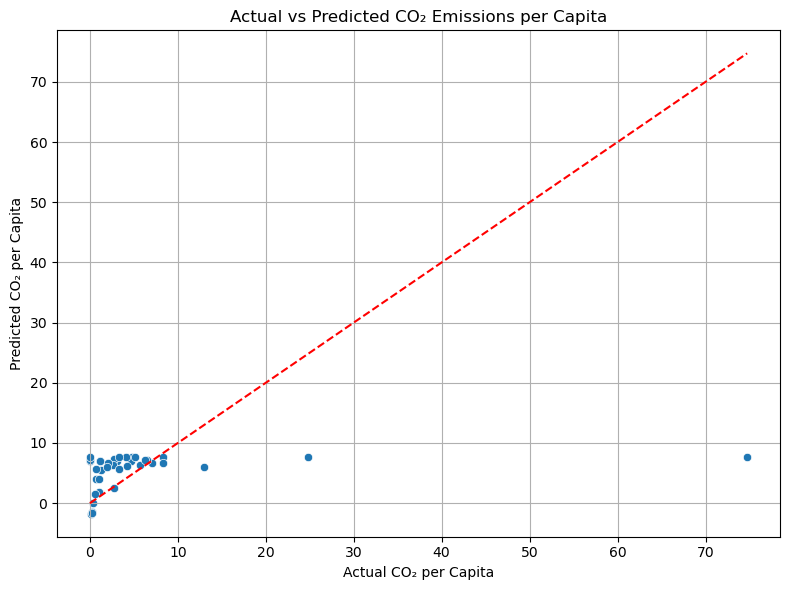

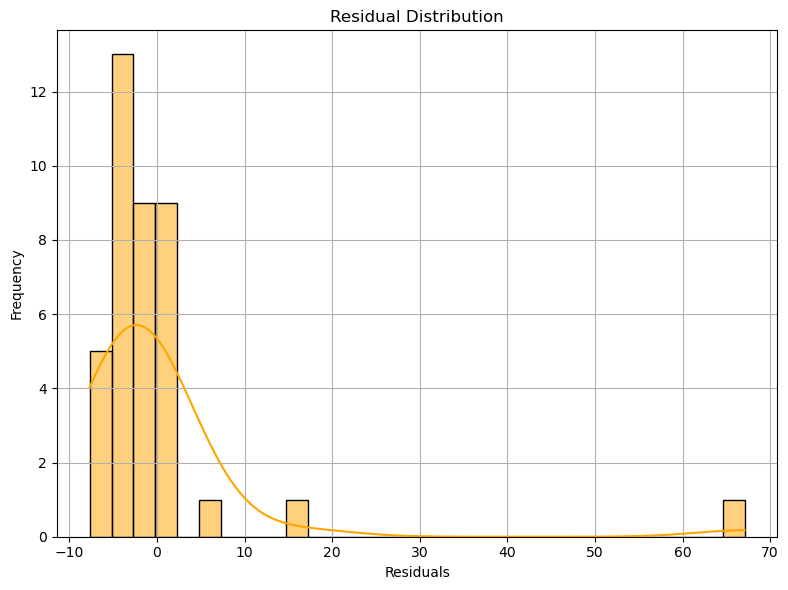

In [6]:
#  Connect to your database
conn = sqlite3.connect(r'C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db')

#  SQL query for MLR
query = """
SELECT 
    "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita) [EN.GHG.CO2.PC.CE.AR5]" AS CO2_per_capita,
    "Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]" AS Renewable_energy_pct,
    "Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]" AS Access_rural_pct,
    "Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]" AS Access_urban_pct,
    "Forest area (sq. km) [AG.LND.FRST.K2]" AS Forest_area
FROM Environmental_Indicators
WHERE 
    CO2_per_capita IS NOT NULL AND
    Renewable_energy_pct IS NOT NULL AND
    Access_rural_pct IS NOT NULL AND
    Access_urban_pct IS NOT NULL AND
    Forest_area IS NOT NULL
LIMIT 500;
"""
#  Load and clean the data
df = pd.read_sql(query, conn)
df = df[(df != '..').all(axis=1)].astype(float)

#  Define target and features
X = df[['Renewable_energy_pct', 'Access_rural_pct', 'Access_urban_pct', 'Forest_area']]
y = df['CO2_per_capita']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit MLR model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", round(r2, 4))
print("MSE:", round(mse, 4))

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual CO₂ per Capita")
plt.ylabel("Predicted CO₂ per Capita")
plt.title("Actual vs Predicted CO₂ Emissions per Capita")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
# step 1: Lasso & Ridge Regression on the CO₂ Model

In [8]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Coefficients:", lasso.coef_)
print("R² (Lasso):", round(r2_lasso, 4))

#  Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
print(" Ridge Coefficients:", ridge.coef_)
print("R² (Ridge):", round(r2_ridge, 4))


Lasso Coefficients: [-2.18183249  0.96706905 -0.04300023  0.49881427]
R² (Lasso): 0.0702
 Ridge Coefficients: [-2.28886332  1.54448307 -0.70658975  0.57730974]
R² (Ridge): 0.0697


In [9]:
# How do foreign direct investment, exports, imports, and domestic savings (as a % of GDP) influence a country’s GDP (in current US dollars)?


In [10]:
# Connect to SQLite database
conn = sqlite3.connect(r'C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db')


In [11]:
import sqlite3
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Connect to SQLite database
conn = sqlite3.connect(r'C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db')

# Query to pull data for MLR
query = """
SELECT 
    "GDP (current US$) [NY.GDP.MKTP.CD]" AS GDP_USD,
    "Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]" AS FDI,
    "Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]" AS Exports,
    "Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]" AS Imports,
    "Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]" AS Savings
FROM Economic_Indicators
WHERE 
    "GDP (current US$) [NY.GDP.MKTP.CD]" IS NOT NULL AND
    "Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]" IS NOT NULL AND
    "Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]" IS NOT NULL AND
    "Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]" IS NOT NULL AND
    "Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]" IS NOT NULL
LIMIT 500;
"""

In [12]:
# Load data into DataFrame
df = pd.read_sql(query, conn)

# Clean and convert to numeric
df = df[(df != '..').all(axis=1)]  # remove rows with placeholder '..'
df = df.astype(float)  # convert all columns to float

#  Define predictors (X) and target (y)
X = df[['FDI', 'Exports', 'Imports', 'Savings']]
y = df['GDP_USD']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the MLR model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Output results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", round(r2, 4))


Coefficients: [-8.46041683e+08 -1.15828230e+10  3.83698363e+09  2.18804792e+10]
Intercept: 329357042407.6295
R² Score: 0.0661


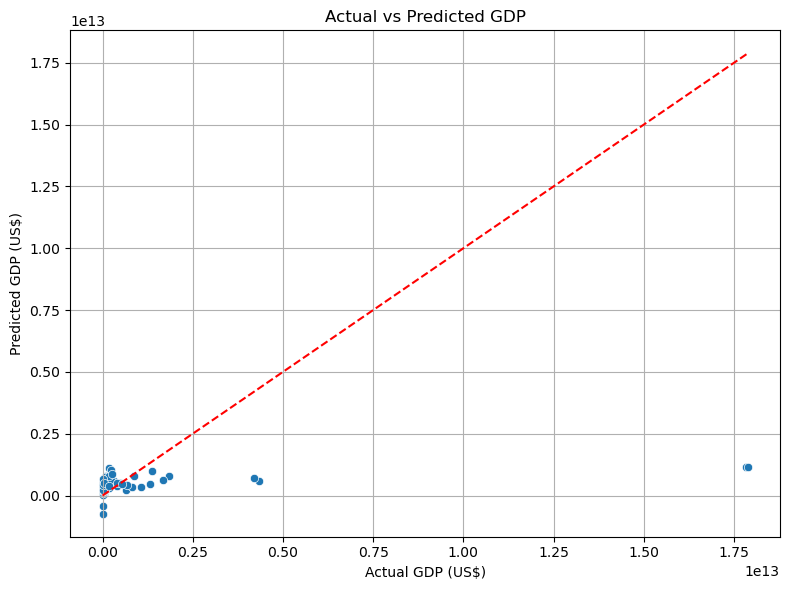

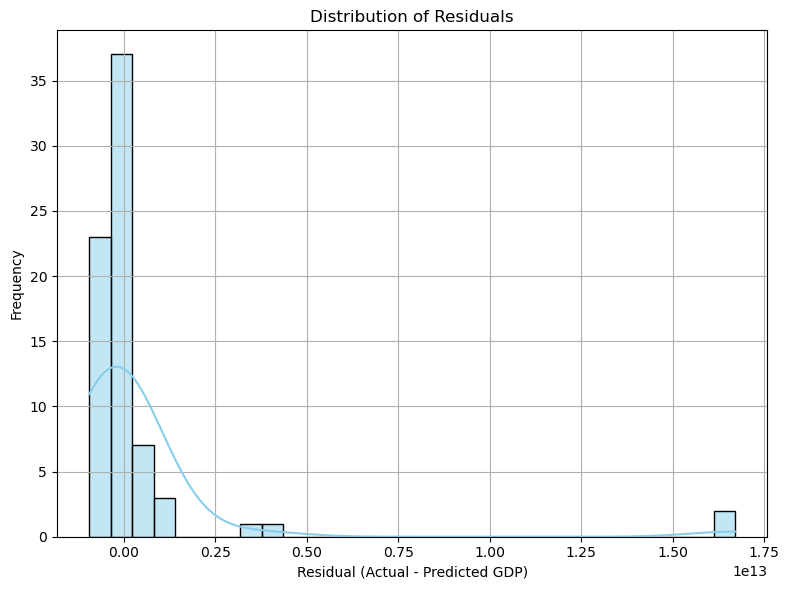

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Actual vs Predicted GDP
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual GDP (US$)")
plt.ylabel("Predicted GDP (US$)")
plt.title("Actual vs Predicted GDP")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.grid(True)
plt.tight_layout()
plt.show()

#  Plot: Residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted GDP)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

# Define predictors (X) and target (y)
X = df[['FDI', 'Exports', 'Imports', 'Savings']]
y = df['GDP_USD']

# Split into training and test sets BEFORE scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Fit the model using scaled features
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#  Predict and evaluate
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

#  Output
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", round(r2, 4))

Coefficients: [-2.91778953e+10 -4.03476811e+11  1.17412735e+11  3.79083929e+11]
Intercept: 435662719071.77026
R² Score: 0.0661


In [15]:
import numpy as np

print("Means after scaling (should be ~0):", np.mean(X_train_scaled, axis=0))
print("Standard deviations after scaling (should be 1):", np.std(X_train_scaled, axis=0))


Means after scaling (should be ~0): [ 3.19379226e-17  1.58168760e-16 -5.47507245e-17  5.09485909e-17]
Standard deviations after scaling (should be 1): [1. 1. 1. 1.]


In [16]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

#  Fit Lasso Regression ( tune alpha for regularization strength)
lasso = Lasso(alpha=1.0)  # Try different values like 0.1, 0.5, 1.0, 10, etc.
lasso.fit(X_train_scaled, y_train)

#  Predict and evaluate
y_pred_lasso = lasso.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Output results
print("Lasso Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print("R² Score (Lasso):", round(r2_lasso, 4))
print("MSE (Lasso):", round(mse_lasso, 2))

Lasso Coefficients: [-2.91778953e+10 -4.03476811e+11  1.17412735e+11  3.79083929e+11]
Intercept: 435662719071.77026
R² Score (Lasso): 0.0661
MSE (Lasso): 8.057723781575092e+24


In [17]:
print("\n Comparison:")
print("Linear Regression R²:", round(r2, 4))
print("Lasso Regression R²:", round(r2_lasso, 4))



 Comparison:
Linear Regression R²: 0.0661
Lasso Regression R²: 0.0661
